In [311]:
# Import Libraries

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [313]:
# Load Data

In [314]:
df = pd.read_csv('data_MultipleLinearRegression.csv')
df.head(5)

,StudyHours,ExtraParticipation,PapersPracticed,PreviousMarks,SleepingHours,PerformanceIndex
0,5,No,2,69,8,51
1,2,Yes,8,46,4,20
2,7,Yes,5,56,7,46
3,6,Yes,5,42,8,28
4,7,No,6,53,4,41


In [315]:
# Explore Data

In [316]:
df.info()
df.describe()

print('\nNull values:')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   StudyHours          10000 non-null  int64 
 1   ExtraParticipation  10000 non-null  object
 2   PapersPracticed     10000 non-null  int64 
 3   PreviousMarks       10000 non-null  int64 
 4   SleepingHours       10000 non-null  int64 
 5   PerformanceIndex    10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB

Null values:


StudyHours            0
ExtraParticipation    0
PapersPracticed       0
PreviousMarks         0
SleepingHours         0
PerformanceIndex      0
dtype: int64

In [317]:
# Change ExtraParticipation column from Yes and No to numerical values

In [318]:
from sklearn.preprocessing import OrdinalEncoder

In [319]:
enc = OrdinalEncoder (categories = [['No', 'Yes']])
df['ExtraParticipation'] = enc.fit_transform(df[['ExtraParticipation']])

In [320]:
df

,StudyHours,ExtraParticipation,PapersPracticed,PreviousMarks,SleepingHours,PerformanceIndex
0,5,0.0,2,69,8,51
1,2,1.0,8,46,4,20
2,7,1.0,5,56,7,46
3,6,1.0,5,42,8,28
4,7,0.0,6,53,4,41
...,...,...,...,...,...,...
9995,8,1.0,6,50,6,48
9996,4,0.0,3,68,9,51
9997,9,0.0,6,48,7,44
9998,1,0.0,0,47,9,20


In [321]:
# Define x

In [322]:
x = df.iloc [:, 0:5]
x

,StudyHours,ExtraParticipation,PapersPracticed,PreviousMarks,SleepingHours
0,5,0.0,2,69,8
1,2,1.0,8,46,4
2,7,1.0,5,56,7
3,6,1.0,5,42,8
4,7,0.0,6,53,4
...,...,...,...,...,...
9995,8,1.0,6,50,6
9996,4,0.0,3,68,9
9997,9,0.0,6,48,7
9998,1,0.0,0,47,9


In [323]:
# Define y

In [324]:
y = df.iloc [:,5]
y

0       51
1       20
2       46
3       28
4       41
        ..
9995    48
9996    51
9997    44
9998    20
9999    24
Name: PerformanceIndex, Length: 10000, dtype: int64

In [325]:
# Visualize Correlation 

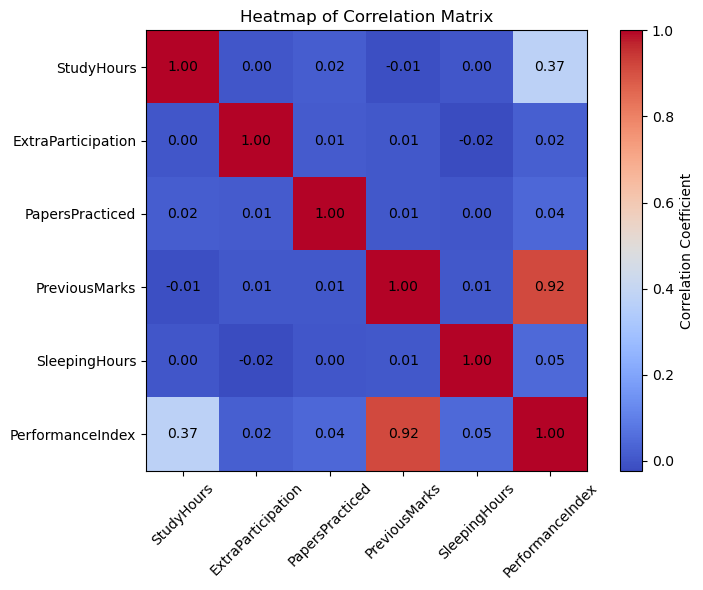

In [326]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')


plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Heatmap of Correlation Matrix")


for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                 ha='center', va='center', color='black', fontsize=10)


plt.tight_layout()
plt.show()

In [327]:
# Normalize values

In [328]:
from sklearn.preprocessing import StandardScaler

In [329]:
scaler = StandardScaler()

In [330]:
num_col = ['StudyHours', 'PapersPracticed', 'PreviousMarks', 'SleepingHours']

In [331]:
df[num_col] = scaler.fit_transform(df[num_col])

In [332]:
# Split Data

In [333]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state = 0)

In [334]:
# Select Model

In [335]:
model = LinearRegression ()

In [336]:
model.fit(x_train, y_train)

LinearRegression()

In [337]:
# Make Prediction

In [338]:
Y_Pred = model.predict (x_test)

In [339]:
Y_Pred

array([40.45068036, 59.9038403 , 25.70026545, ..., 56.80832946,
       43.72651969, 39.3236884 ])

In [340]:
# Evaluate Model

In [341]:
MSE = mean_squared_error (y_test, Y_Pred)
R2_Score = r2_score (y_test, Y_Pred)

In [342]:
MSE

4.109663870867651

In [343]:
R2_Score

0.9887596248705428

In [344]:
# Visualize Predicted Y and test Y

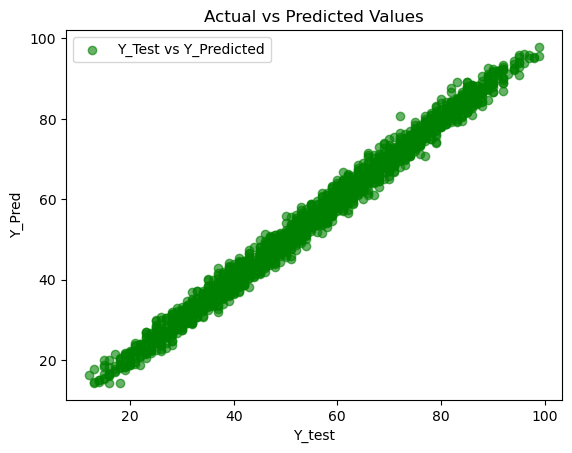

In [345]:

plt.scatter(y_test, Y_Pred, alpha = 0.6, color='green', label='Y_Test vs Y_Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Y_test')
plt.ylabel('Y_Pred')
plt.legend()